# TP ML : Apprentissage supervisé - Part II

### Nom-prénom du binôme :

## - Import des données MNIST

In [131]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from pylab import *
from sklearn.datasets import fetch_mldata
#from sklearn.datasets import fetch_openml
from sklearn.cluster import KMeans
from sklearn import svm  
from sklearn import datasets  
import numpy as np
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import GridSearchCV

#from mlxtend.data import loadlocal_mnist

#mnist = fetch_mldata("MNIST original", data_home="/home/lartizien/TP_ML_CPE2019")

#Load data from https://www.openml.org/d/554
#X, Y = fetch_openml('mnist_784', version=1, return_X_y=True)

mnist = fetch_mldata("MNIST original", data_home="/softwares/INFO/IMI_module_ML/scikit_learn_data/")


X, Y = mnist.data / 255., mnist.target

print(X.shape)
print(Y.shape) 

                    
# rescale the data, use the traditional train/test split
X, Y = mnist.data / 255., mnist.target


(70000, 784)
(70000,)


## - Construction de la base d'apprentissage

In [132]:
#Selection de n= 4000 points d'entrainements parmi les 60000 premiers exemples de MNIST
np.random.seed(seed=10)

ind_train=np.random.choice(np.arange(60000)+1, 1000, replace = False)

print(ind_train.shape)
print(max(ind_train))
print(min(ind_train))

x_train=X[ind_train]
print(x_train.shape)

y_train=Y[ind_train]
print(y_train.shape)

#Nb d'exemples par classe dans x_train

a=0
print(max(y_train))
print(min(y_train))
for k in range(0, 10): 
    print((y_train == k).sum())
    a=a+((y_train == k).sum())
print(a)

#Construction de la base de test : 10000 derniers exemples de MNIST
x_test = X[60000:]
y_test = Y[60000:]
a=0
for k in range(0, 10): 
    print((y_test == k).sum())
    a=a+((y_test == k).sum())
print(a)

(1000,)
59994
26
(1000, 784)
(1000,)
9.0
0.0
125
105
99
103
75
80
95
86
102
130
1000
980
1135
1032
1010
982
892
958
1028
974
1009
10000


## - Visualisation des données

1.0


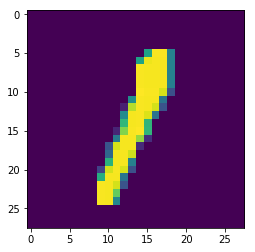

In [133]:
ind_img=11450
im=X[ind_img]
print(Y[ind_img])
im = im.reshape((28,28))
mpl.pylab.imshow(im)
plt.show()

## - A vous de jouer

#### -  Entrainez et mesurez les performances des modèles suivants:
- Linear SVM
- RBF SVM

#### et au moins un modèle parmi

- Decision tree
- Random forest
- Régression logistique
.....

#### - Pour chaque modèle, faire varier ses hyperparamètres et reportez les résultats dans un tableau.

#### Astuce : utilisez la fonction GridSearchCV

test
The parameters of the best model are: 
{'C': 1, 'kernel': 'linear'}
{'mean_fit_time': array([ 0.27291021,  1.0242352 ,  0.270544  ,  1.02423043]), 'std_fit_time': array([ 0.00173755,  0.00575768,  0.00274472,  0.00374888]), 'mean_score_time': array([ 0.08579764,  0.13422685,  0.08484349,  0.13415627]), 'std_score_time': array([ 0.00130865,  0.00056898,  0.00116912,  0.00057792]), 'param_C': masked_array(data = [1 1 10 10],
             mask = [False False False False],
       fill_value = ?)
, 'param_kernel': masked_array(data = ['linear' 'rbf' 'linear' 'rbf'],
             mask = [False False False False],
       fill_value = ?)
, 'params': [{'C': 1, 'kernel': 'linear'}, {'C': 1, 'kernel': 'rbf'}, {'C': 10, 'kernel': 'linear'}, {'C': 10, 'kernel': 'rbf'}], 'split0_test_score': array([ 0.85643564,  0.51485149,  0.85643564,  0.55445545]), 'split1_test_score': array([ 0.86567164,  0.46766169,  0.86567164,  0.52736318]), 'split2_test_score': array([ 0.88 ,  0.475,  0.88 ,  0.515]), '

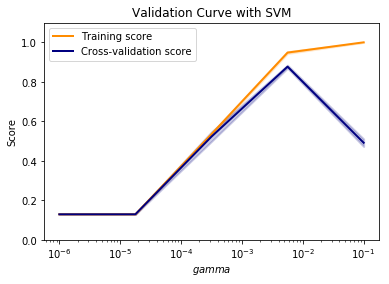

In [134]:
print("test")
'''
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
svc = svm.SVC(kernel='rbf', C=C, gamma = 0.1)
clf = GridSearchCV(svc, parameters)
clf.fit(x_train,y_train )

sorted(clf.cv_results_.keys())
'''
svc = svm.SVC(kernel='rbf', C=C, gamma = 0.1)
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}

validator = GridSearchCV(svc,
                         parameters, cv = 5)
validator.fit(x_train, y_train)
print('The parameters of the best model are: ')
print(validator.best_params_)

print(validator.cv_results_)



C=1.00
svc = svm.SVC(kernel='linear', C=C).fit(x_train, y_train)
svc.fit(x_train, y_train) 
svc.get_params() 
svc.support_ #indice des vecteurs support
svc.support_vectors_
SV_multi=svc.support_vectors_
SV_multi_ind=svc.support_
h=0.02
X=x_test
Y=y_test
print(X.shape)
print(Y.shape)

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

print(xx.shape)
print(yy.shape)

'''
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()]) #Z(51700,) renvoie classe (0 ou 1)
Z = Z.reshape(xx.shape)#Z(220,235)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.2)
# Affichage des points d'apprentissage
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.coolwarm)
#Affichage des vecteurs support
plt.scatter(X[SV_multi_ind, 0], X[SV_multi_ind, 1], c='green', marker='x', s= 40)
plt.show()'''

Z = svc.predict(x_test) #Z(51700,) renvoie classe (0 ou 1)
from sklearn.model_selection import validation_curve
param_range = np.logspace(-6, -1, 5)
train_scores, test_scores = validation_curve(svm.SVC(), x_train, y_train, param_name="gamma", param_range=param_range, cv=5, scoring="accuracy", n_jobs=1)
print(train_scores.shape)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve with SVM")
plt.xlabel("$gamma$")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()




## - Pour aller plus loin

Extract other feature types from the original MNIST data, eg  
HOG features (see https://scikit-image.org/docs/dev/auto_examples/features_detection/plot_hog.html) (this requires to install the skimage package!)

Estimate the best performance achieved with this new feature set. How does it compare to the performance achieved with the original grey level?
